# Financial Data Visualization using doViz (Beta1.0)

doViz (dodo🦤Visualizer) is an open source financial data visualization tool from tradingDodo.
- doViz can represent any sequential/streaming data with or without timestamp
- doViz can be used to analyze local time-series CSV files by analyzing them sequentially
- currently in doViz beta1.0 we are starting with visualizing financial data

In [2]:
from doviz import pricedatalayer as player

## Defining a historical price layer for different tickers
We can define a historical price layer and call getPrice() everytime to get the next recorded price 
The priceHistorical module makes us of the folder **tickerdata**, the prices of only those stocks are usable by the module whose price data is available inside the tickerdata folder.

In [2]:
ph = player.priceHistorical("AAPL",20)
for tstamp in range(10):
    print("price %s" %ph.getPrice())

price ['12/30/2020', 133.72, 96452120]
price ['12/31/2020', 132.69, 99116590]
price ['01/04/2021', 129.41, 143301900]
price ['01/05/2021', 131.01, 97664900]
price ['01/06/2021', 126.6, 155088000]
price ['01/07/2021', 130.92, 109578200]
price ['01/08/2021', 132.05, 105158200]
price ['01/11/2021', 128.98, 100620900]
price ['01/12/2021', 128.8, 91951150]
price ['01/13/2021', 130.89, 88636830]


## Analyzing Historical daily free data from NASDAQ 
Historical daily data from NASDAQ work perfectly with the historical price module.
Since the authors of the repo used NASDAQ daily data for the work, they made sure any downloaded data from their page works:
An example of data is available in the link below. Additional stock price data available. You can download all stock data you are interested in, and then run the script below to see which Tickers you collected.  
https://www.nasdaq.com/market-activity/stocks/aapl/historical
Some, ticker files collected have been included in the repo, but the data will not be the latest data. 

In [3]:
#FUNCTION to get all TICKER's as a list from the tickerdata folder 
import glob
def getalltickers():
    alltickers = []
    for el in glob.glob("tickerdata/*.csv"):
        tmp = el.split("\\")[1]
        finx= tmp.split(".")[0]
        alltickers.append(finx)
    return alltickers

print(getalltickers())

['AAPL', 'AMC', 'AMD', 'DAL', 'FB', 'GME', 'INO', 'INTC', 'JBLU', 'LYFT', 'MRNA', 'MSFT', 'PFE', 'SHOP', 'UAL', 'UBER', 'ZM']


### Defining a priceDataLayer from a date
in _player.priceDataLayer("01/12/2018",0.5)_
priceDataLayer stores information of multiple tickers, and hence we need to define these thigs here:
- **date_of_visualization_start** =  (%m/%d/%Y) eg. "01/12/2018", please note that if a trading data on a date is not available, mostly because its a Saturday/Sunday, you'll get an error saying "this day is untraded". In that case you can add or subtract days till you don't get the error anymore.
- **refresh_seconds** = 0.5, which means after every 0.5seconds the prices of all the tickers will be refresged

in _pdl.addTickers(["UAL","DAL","JBLU"],[-1])_
- **tickerList** = the tickers you want to visualize
- **priceContext** = every time the new price is pulled, the ratio of the new to old price is stored as an element in the price-vector

### Adding tickers to priceDataLayer
In the example below we add _"UAL","DAL","JBLU"_ as tickers and we also add priceContext of 1

### priceDataLayer.visualize
visualize is the primary function inside priceDataLayer. It has two modes,
- _allplots_ : Shows (price, price velcity, volume bars, change heatmaps); Detached plots
- _priceonly_ : Combined stocks

(With time we'll be adding more kinds of visualizations)


### Visualizing prices of MSFT, AAPL, FB since 01/12/2018
- We define a priceDataLayer starting from 01/12/2018
- Add tickers MSFT, AAPL, FB (if any ticker isnt available on the day, it won't be displayed)
- (Optional) setting dark mode to True.
- We visualize with mode 'priceonly'

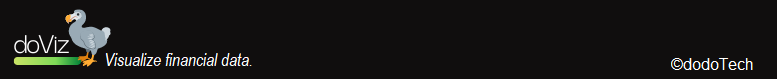

In [6]:
pdl = player.priceDataLayer("01/10/2019",0.1)
pdl.addTickers(["MSFT","FB","AAPL"],[-1]) 
pdl.setDarkMode(True)
pdl.visualize("priceonly")

### What happened to Gamestop this week? 01/31/2021
Unfortunately we don't have the second by second data for the day of the spike, but regardless, we can see the crazy activity over the last week, and the spike of 300%.

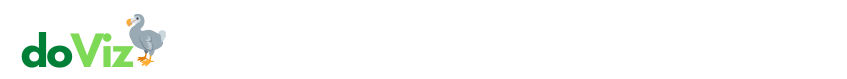

In [4]:
#visualizing stock prices of UAL, DAL, JBLU since 01/12/2018
pdl = player.priceDataLayer("12/21/2020",0.1)
pdl.setDarkMode(False)
pdl.addTickers(["GME","AMC","INTC"],[-1]) 
pdl.visualize("priceonly")

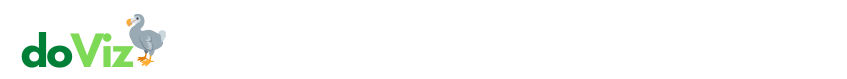

In [3]:
#visualizing stock prices of UAL, DAL, JBLU since 01/12/2018
pdl = player.priceDataLayer("10/21/2020",0.1)
pdl.setDarkMode(False)
pdl.addTickers(["GME","AMC"],[-1]) 
pdl.visualize("all")

### Creating a dashboard for analysis of price data using doviz and ipywidgets
Here we have tries creating a simple dashboard, that retrieves the stock data ticker from your tickerdata folder and then creates a drop down menu
Run the code below to get to the dashboard

In [9]:
from ipywidgets import interact, widgets
from IPython.display import display
import glob
from doviz import pricedatalayer as priceDataLayer

#function to retrieve all available tickers, before populating drop down menu
def getalltickers():
    alltickers = []
    for el in glob.glob("tickerdata/*.csv"):
        tmp = el.split("\\")[1]
        finx= tmp.split(".")[0]
        alltickers.append(finx)
    return alltickers

global_variables = list(globals().keys())
allops = getalltickers()

global_vars = widgets.SelectMultiple(
    options=allops)

butt = widgets.Button(description='Select Tickers!')
outt = widgets.Output()

text = widgets.Text(
    value='last',
    placeholder='Enter Simulation start date!',
    description='Enter Date to start Simulation!:',
    disabled=False
)
selectedTickers = None

def assignselected(stickers):
    print("Tickers to analyze:",stickers)
    global selectedTickers
    selectedTickers = stickers

def on_butt_clicked(b):
    with outt:
        clear_output()
        selectedTickers = list(global_vars.value)
        assignselected(selectedTickers)
        
def callback(wdgt):
    global selectedTickers
    datex = wdgt.value
    pdl = priceDataLayer.priceDataLayer(datex,1)
    pdl.setDarkMode(False)
    pdl.addTickers(selectedTickers,[-1]) #tickerpricelayerdays
    pdl.visualize("all")

text.on_submit(callback)
butt.on_click(on_butt_clicked)
widgets.VBox([global_vars,butt,outt,text])